In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

In [119]:
data_set = pd.read_csv("Social_Network_Ads.csv")

In [120]:
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [121]:
data_set["Gender"].replace({"Male" : 0, "Female" : 1},inplace=True)

In [122]:
data_set.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0


In [123]:
X = data_set.iloc[:,1:4]
y = data_set.iloc[:,-1]

In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## 1.  Using cross_validation:

In [126]:
clf = DecisionTreeClassifier(max_depth=2)

In [127]:
from sklearn.model_selection import cross_val_score

In [128]:
f1_score = cross_val_score(clf,X_train,y_train,scoring="f1",cv=10,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [129]:
f1_score.mean()

0.8988101754813291

In [130]:
accuracy = cross_val_score(clf,X_train,y_train,scoring="accuracy",cv=10,verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [131]:
accuracy.mean()

0.9285714285714285

## 2. Visualize Decision Tree

In [133]:
# Visualize Decision Tree
from sklearn.tree import plot_tree

In [134]:
clf1 = DecisionTreeClassifier(max_depth=2)

In [135]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'Age <= 42.5\ngini = 0.448\nsamples = 280\nvalue = [185, 95]\nclass = P'),
 Text(0.25, 0.5, 'EstimatedSalary <= 89500.0\ngini = 0.272\nsamples = 209\nvalue = [175, 34]\nclass = P'),
 Text(0.125, 0.16666666666666666, 'gini = 0.055\nsamples = 177\nvalue = [172, 5]\nclass = P'),
 Text(0.375, 0.16666666666666666, 'gini = 0.17\nsamples = 32\nvalue = [3, 29]\nclass = u'),
 Text(0.75, 0.5, 'Age <= 46.5\ngini = 0.242\nsamples = 71\nvalue = [10, 61]\nclass = u'),
 Text(0.625, 0.16666666666666666, 'gini = 0.444\nsamples = 12\nvalue = [4, 8]\nclass = u'),
 Text(0.875, 0.16666666666666666, 'gini = 0.183\nsamples = 59\nvalue = [6, 53]\nclass = u')]

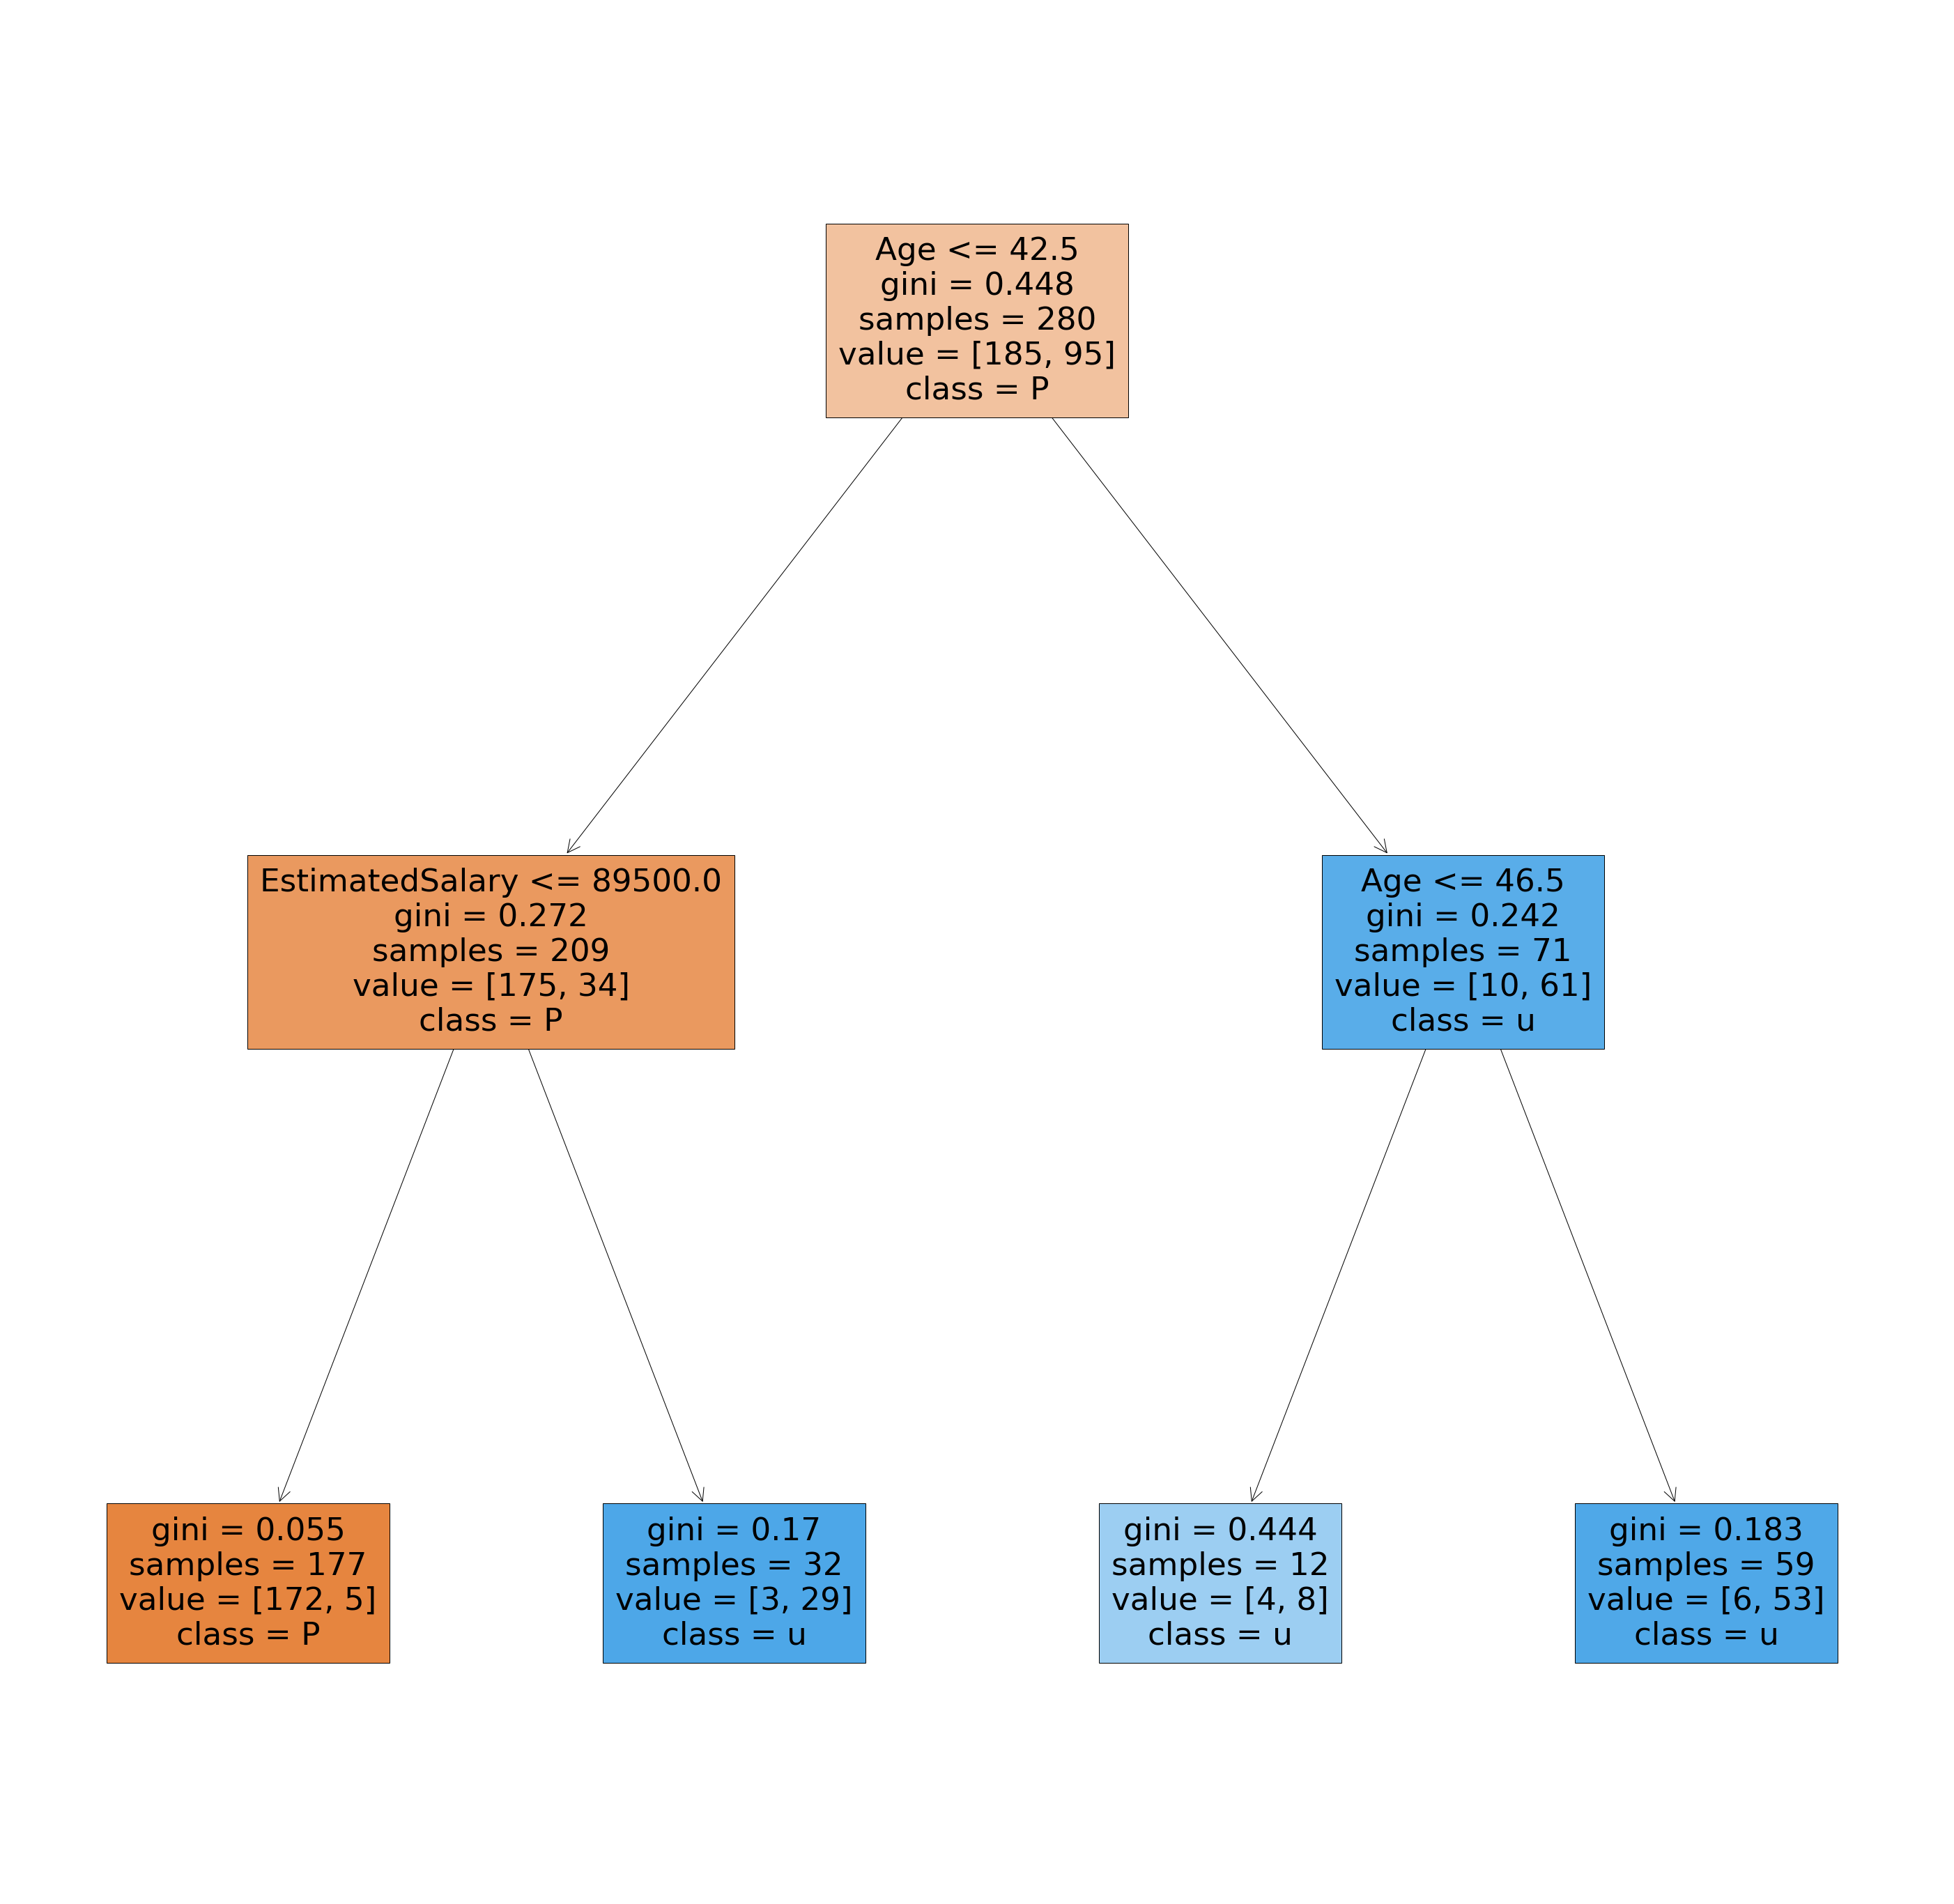

In [136]:
_, ax = plt.subplots(figsize=(50,50)) # Resize figure
plot_tree(clf1,feature_names=X_train.columns,class_names=y_train.name,ax=ax,filled=True)

## 3. Plot a 2d graph depicting how decision tree cuts in cuboids

In [192]:
# we take 2 features -> Age[index=1] & Estimated Salary[index=1]
X_train.head(1)

,Gender,Age,EstimatedSalary
39,1,27,31000


In [209]:
clf3 = DecisionTreeClassifier(max_depth=2)

In [210]:
clf3.fit(X_train.iloc[:,1:3],y_train)

DecisionTreeClassifier(max_depth=2)

In [211]:
x1 = X.iloc[:,1].values
x2 = X.iloc[:,2].values

In [212]:
a = np.arange(start= x1.min()-1,stop=x1.max()+1,step=0.1)

In [213]:
a.size

440

In [214]:
b = np.arange(start= x2.min()-1, stop= x2.max()+1, step=100)

In [215]:
b.size

1351

In [216]:
XX,yy = np.meshgrid(a,b)

In [217]:
XX.size

594440

In [218]:
XX.ravel().size

594440

In [219]:
input_array = np.array([XX.ravel(),yy.ravel()]).T

In [220]:
labels = clf3.predict(input_array)

C:\Users\SREEMAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


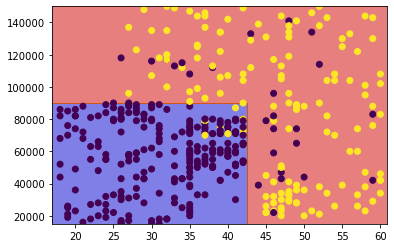

In [221]:
plt.contourf(XX,yy,labels.reshape(XX.shape),alpha=0.5,cmap="jet")
plt.scatter(x1,x2,c=y)

## 4 Hyper param-tuning sample(max_depth)

In [77]:
def plot_metrics (X,y,X_name,y_name):
    plt.figure(figsize=(10,6))
    plt.plot(X,y,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', 
             markersize=10)
    plt.title('{} vs. {}'.format(y_name,X_name))
    plt.xlabel('{}'.format(X_name))
    plt.ylabel('{}'.format(y_name))

In [79]:
def best_decision_tree_param (X_train,y_train):
    f1_mean = []
    accuracy_mean = []
    max_depth_range = list(range(0,30))
    
    # check cross_val_score for all max_depth values 
    for i in max_depth_range:
        if i == 0:
            i = None
        clf = DecisionTreeClassifier(max_depth=i)
        f1_score = cross_val_score(clf,X_train,y_train,scoring="f1",cv=10,verbose=0)
        f1_mean.append(f1_score.mean())
        accuracy = cross_val_score(clf,X_train,y_train,scoring="accuracy",cv=10,verbose=0)
        accuracy_mean.append(accuracy.mean())
        
    # plot acc._mean vs max_depth
    plot_metrics(X = max_depth_range,y = accuracy_mean,X_name = "Max_depth", 
                 y_name="Accuracy_mean Rate")
    # plot acc._mean vs max_depth
    plot_metrics(X = max_depth_range,y = f1_mean,X_name = "Max_depth", 
                 y_name="f1_mean Rate")

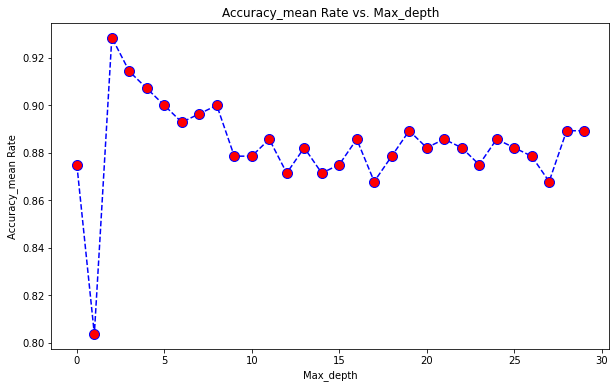

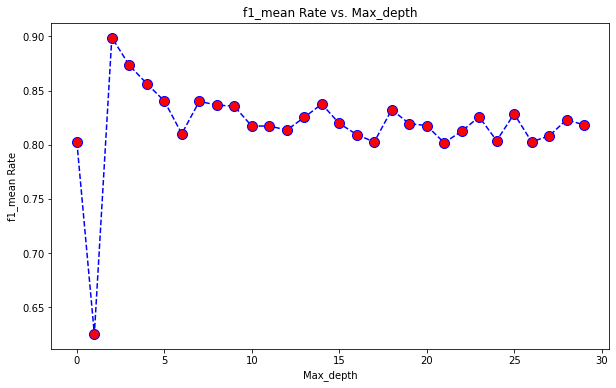

In [80]:
best_decision_tree_param(X_train,y_train)